<a href="https://colab.research.google.com/github/cheblkhaled/PFA/blob/main/Mod%C3%A8le_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Partie** **1 (Importation des données + Prétraitement)**





**1. les bibliothèques nécessaires et la Dataset**

In [ ]:
Yt_test.to_csv("test1.csv")
dd = pd.DataFrame("predict_inter")
dd.to_csv("pred1.csv")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
donnees = pd.read_csv("essai.csv", sep=';')
donnees

,Time,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),Frame error rate,RSCP (detected),Scrambling code (detected)
0,8:36:11.915,UMTS FDD 2100 band 1,10738,387,-73.2,-9.9,NaN,NaN,NaN
1,8:36:12.338,UMTS FDD 2100 band 1,10738,387,-78.1,-14.3,NaN,NaN,NaN
2,8:36:13.021,UMTS FDD 2100 band 1,10738,387,-74.3,-10.6,NaN,NaN,NaN
3,8:36:13.535,"UMTS FDD 2100 band 1, UMTS FDD 2100 band 1","10713, 10738","387, 387","-68.1, -71.9","-7.0, -7.2",NaN,"-70.4, -80.4","395, 138"
4,8:36:14.018,"UMTS FDD 2100 band 1, UMTS FDD 2100 band 1","10738, 10713","387, 387","-71.4, -69.1","-5.9, -8.2",NaN,"-70.0, -79.8","395, 138"
...,...,...,...,...,...,...,...,...,...
8327,9:43:58.865,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","186, 31, 178","-91.6, -92.0, -97.8","-10.1, -10.5, -13.5",NaN,-101.5,49
8328,9:43:59.410,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","31, 186, 178","-91.3, -93.7, -98.6","-9.2, -11.6, -14.4",NaN,-102.7,49
8329,9:43:59.910,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","31, 186, 178","-90.5, -94.3, -98.9","-8.8, -12.6, -15.1",NaN,-102.2,49
8330,9:44:00.256,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


**2. Afficher les  informations sur la Datasets (dimensions, description et données manquantes) :**



In [ ]:
print("Dimensions de la dataset:", donnees.shape)

Dimensions de la dataset: (8332, 9)


In [ ]:
print ("Les colonnes du dataset:\n")
donnees.columns

Les colonnes du dataset:



Index(['Time', 'Band (active)', 'Channel number (active)',
       'Scrambling code (active)', 'RSCP (active)', 'Ec/N0 (active)',
       'Frame error rate', 'RSCP (detected)', 'Scrambling code (detected)'],
      dtype='object')

In [ ]:
print("Les colonnes du dataset:\n")
donnees.info()

Les colonnes du dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8332 entries, 0 to 8331
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Time                        8332 non-null   object 
 1   Band (active)               8322 non-null   object 
 2   Channel number (active)     8322 non-null   object 
 3   Scrambling code (active)    8322 non-null   object 
 4   RSCP (active)               8322 non-null   object 
 5   Ec/N0 (active)              8322 non-null   object 
 6   Frame error rate            8 non-null      float64
 7   RSCP (detected)             7117 non-null   object 
 8   Scrambling code (detected)  7117 non-null   object 
dtypes: float64(1), object(8)
memory usage: 586.0+ KB


Le type initial des données dans notre dataset:



<Axes: ylabel='count'>

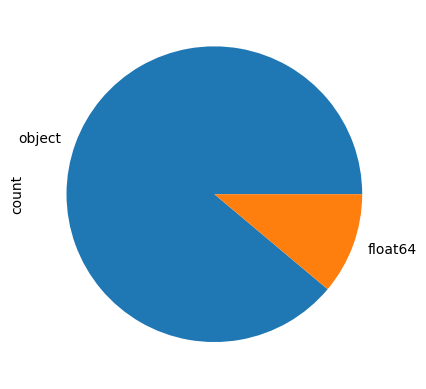

In [ ]:
print("Le type initial des données dans notre dataset:\n")
donnees.dtypes.value_counts().plot.pie()

In [ ]:
print("5 premières lignes:")
donnees.head()

5 premières lignes:


,Time,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),Frame error rate,RSCP (detected),Scrambling code (detected)
0,8:36:11.915,UMTS FDD 2100 band 1,10738,387,-73.2,-9.9,NaN,NaN,NaN
1,8:36:12.338,UMTS FDD 2100 band 1,10738,387,-78.1,-14.3,NaN,NaN,NaN
2,8:36:13.021,UMTS FDD 2100 band 1,10738,387,-74.3,-10.6,NaN,NaN,NaN
3,8:36:13.535,"UMTS FDD 2100 band 1, UMTS FDD 2100 band 1","10713, 10738","387, 387","-68.1, -71.9","-7.0, -7.2",NaN,"-70.4, -80.4","395, 138"
4,8:36:14.018,"UMTS FDD 2100 band 1, UMTS FDD 2100 band 1","10738, 10713","387, 387","-71.4, -69.1","-5.9, -8.2",NaN,"-70.0, -79.8","395, 138"


In [ ]:
print("5 dernières lignes:")
donnees.tail()

5 dernières lignes:


,Time,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),Frame error rate,RSCP (detected),Scrambling code (detected)
8327,9:43:58.865,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","186, 31, 178","-91.6, -92.0, -97.8","-10.1, -10.5, -13.5",NaN,-101.5,49
8328,9:43:59.410,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","31, 186, 178","-91.3, -93.7, -98.6","-9.2, -11.6, -14.4",NaN,-102.7,49
8329,9:43:59.910,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","31, 186, 178","-90.5, -94.3, -98.9","-8.8, -12.6, -15.1",NaN,-102.2,49
8330,9:44:00.256,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
8331,9:44:00.450,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","31, 186, 178","-91.0, -93.8, -100.7","-8.7, -11.5, -16.4",NaN,-101.2,49


In [ ]:
print("distribution des données nulles:\n")
donnees.isnull().sum()

distribution des données nulles:



Time                             0
Band (active)                   10
Channel number (active)         10
Scrambling code (active)        10
RSCP (active)                   10
Ec/N0 (active)                  10
Frame error rate              8324
RSCP (detected)               1215
Scrambling code (detected)    1215
dtype: int64

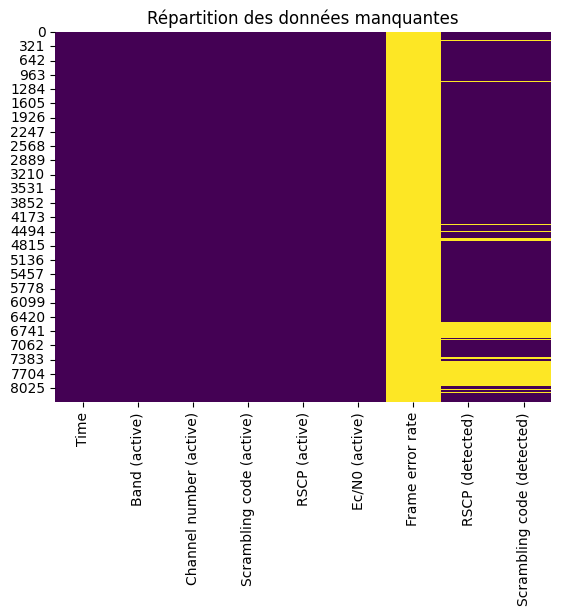

In [ ]:
sns.heatmap(donnees.isnull(), cbar=False, cmap='viridis')
plt.title("Répartition des données manquantes");

**3. Prétraitement**

Les valeurs manquantes

In [ ]:
df = donnees.apply(lambda x: x.fillna(x.mode().iloc[0]))
df

,Time,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),Frame error rate,RSCP (detected),Scrambling code (detected)
0,8:36:11.915,UMTS FDD 2100 band 1,10738,387,-73.2,-9.9,0.0,"-108.4, -116.7",49
1,8:36:12.338,UMTS FDD 2100 band 1,10738,387,-78.1,-14.3,0.0,"-108.4, -116.7",49
2,8:36:13.021,UMTS FDD 2100 band 1,10738,387,-74.3,-10.6,0.0,"-108.4, -116.7",49
3,8:36:13.535,"UMTS FDD 2100 band 1, UMTS FDD 2100 band 1","10713, 10738","387, 387","-68.1, -71.9","-7.0, -7.2",0.0,"-70.4, -80.4","395, 138"
4,8:36:14.018,"UMTS FDD 2100 band 1, UMTS FDD 2100 band 1","10738, 10713","387, 387","-71.4, -69.1","-5.9, -8.2",0.0,"-70.0, -79.8","395, 138"
...,...,...,...,...,...,...,...,...,...
8327,9:43:58.865,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","186, 31, 178","-91.6, -92.0, -97.8","-10.1, -10.5, -13.5",0.0,-101.5,49
8328,9:43:59.410,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","31, 186, 178","-91.3, -93.7, -98.6","-9.2, -11.6, -14.4",0.0,-102.7,49
8329,9:43:59.910,"UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...","3024, 3024, 3024","31, 186, 178","-90.5, -94.3, -98.9","-8.8, -12.6, -15.1",0.0,-102.2,49
8330,9:44:00.256,"UMTS FDD 2100 band 1, UMTS FDD 2100 band 1","10688, 10713","125, 125",-67.0,-3.0,0.0,"-108.4, -116.7",49


In [ ]:
df.isna().sum()

Time                          0
Band (active)                 0
Channel number (active)       0
Scrambling code (active)      0
RSCP (active)                 0
Ec/N0 (active)                0
Frame error rate              0
RSCP (detected)               0
Scrambling code (detected)    0
dtype: int64

In [ ]:
print("\n5 premières lignes:")
print(df.head())


5 premières lignes:
           Time                               Band (active)  \
0   8:36:11.915                        UMTS FDD 2100 band 1   
1   8:36:12.338                        UMTS FDD 2100 band 1   
2   8:36:13.021                        UMTS FDD 2100 band 1   
3   8:36:13.535  UMTS FDD 2100 band 1, UMTS FDD 2100 band 1   
4   8:36:14.018  UMTS FDD 2100 band 1, UMTS FDD 2100 band 1   

  Channel number (active) Scrambling code (active) RSCP (active)  \
0                   10738                      387         -73.2   
1                   10738                      387         -78.1   
2                   10738                      387         -74.3   
3            10713, 10738                 387, 387  -68.1, -71.9   
4            10738, 10713                 387, 387  -71.4, -69.1   

  Ec/N0 (active)  Frame error rate RSCP (detected) Scrambling code (detected)  
0           -9.9               0.0  -108.4, -116.7                         49  
1          -14.3               

In [ ]:
df["Band (active)"]

0                                    UMTS FDD 2100 band 1
1                                    UMTS FDD 2100 band 1
2                                    UMTS FDD 2100 band 1
3              UMTS FDD 2100 band 1, UMTS FDD 2100 band 1
4              UMTS FDD 2100 band 1, UMTS FDD 2100 band 1
                              ...                        
8327    UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...
8328    UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...
8329    UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...
8330           UMTS FDD 2100 band 1, UMTS FDD 2100 band 1
8331    UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...
Name: Band (active), Length: 8332, dtype: object

In [ ]:
df['Band (active)'].value_counts()

Band (active)
UMTS FDD 2100 band 1, UMTS FDD 2100 band 1                                                                      4067
UMTS FDD 2100 band 1, UMTS FDD 2100 band 1, UMTS FDD 2100 band 1                                                1614
UMTS FDD 900 band 8                                                                                              977
UMTS FDD 2100 band 1, UMTS FDD 2100 band 1, UMTS FDD 2100 band 1, UMTS FDD 2100 band 1                           621
UMTS FDD 900 band 8, UMTS FDD 900 band 8                                                                         436
UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS FDD 900 band 8                                                    329
UMTS FDD 2100 band 1                                                                                             220
UMTS FDD 2100 band 1, UMTS FDD 2100 band 1, UMTS FDD 2100 band 1, UMTS FDD 2100 band 1, UMTS FDD 2100 band 1      42
UMTS FDD 2100 band 1, UMTS FDD 900 band 8, UMTS FD

In [ ]:
df['Band (active)'] = df ['Band (active)'].str.extract(r'(\d+)')

<Axes: ylabel='count'>

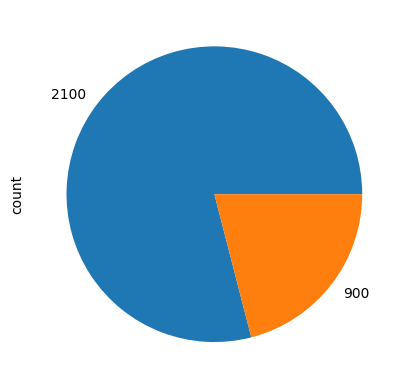

In [ ]:
df['Band (active)'].value_counts().plot.pie()

Conversion numérique

In [ ]:
#conversion to float64
df['RSCP (active)'] = pd.to_numeric(df['RSCP (active)'], errors = 'coerce')
df['RSCP (detected)'] = pd.to_numeric(df['RSCP (detected)'], errors = 'coerce')
df['Ec/N0 (active)'] = pd.to_numeric(df['Ec/N0 (active)'], errors = 'coerce')
df['Scrambling code (active)'] = pd.to_numeric(df['Scrambling code (active)'], errors = 'coerce')
df['Scrambling code (detected)'] = pd.to_numeric(df['Scrambling code (detected)'], errors = 'coerce')


In [ ]:
df['Band (active)'].value_counts()

Band (active)
2100    6584
900     1748
Name: count, dtype: int64

In [ ]:
df['Band (active)'] = pd.to_numeric(df['Band (active)'], errors = 'coerce')
df['Band (active)']

0       2100
1       2100
2       2100
3       2100
4       2100
        ... 
8327     900
8328     900
8329     900
8330    2100
8331     900
Name: Band (active), Length: 8332, dtype: int64

In [ ]:
# Conversion de la colonne 'Band'
def convert_band(value):
    if pd.notna(value) and '2100' in str(value):
        return 1
    else:
        return 0

df['Band (active)'] = df['Band (active)'].apply(convert_band)

In [ ]:
# Conversion des colonnes et calcul de la moyenne pour chaque paire de valeurs
columns_to_convert = ['Channel number (active)', 'Scrambling code (active)',
                      'RSCP (active)', 'Ec/N0 (active)', 'RSCP (detected)', 'Scrambling code (detected)']

for column in columns_to_convert:
    # Conversion en type numérique
    df[column] = df[column].apply(lambda x: pd.to_numeric(x.split(', '), errors='coerce') if isinstance(x, str) else x)
    # Calcul de la moyenne et création d'une nouvelle colonne
    df[f'{column}_mean'] = df[column].apply(lambda x: np.nanmean(x) if isinstance(x, (list, np.ndarray)) else x)

In [ ]:
# Afficher la colonne "Scrambling code (active)"
df["Scrambling code (active)"]

0       387.0
1       387.0
2       387.0
3         NaN
4         NaN
        ...  
8327      NaN
8328      NaN
8329      NaN
8330      NaN
8331      NaN
Name: Scrambling code (active), Length: 8332, dtype: float64

In [ ]:
# Suppression des colonnes originales
df = df.drop(columns=columns_to_convert)

In [ ]:
df

,Time,Band (active),Frame error rate,Channel number (active)_mean,Scrambling code (active)_mean,RSCP (active)_mean,Ec/N0 (active)_mean,RSCP (detected)_mean,Scrambling code (detected)_mean
0,8:36:11.915,1,0.0,10738.0,387.0,-73.2,-9.9,NaN,49.0
1,8:36:12.338,1,0.0,10738.0,387.0,-78.1,-14.3,NaN,49.0
2,8:36:13.021,1,0.0,10738.0,387.0,-74.3,-10.6,NaN,49.0
3,8:36:13.535,1,0.0,10725.5,NaN,NaN,NaN,NaN,NaN
4,8:36:14.018,1,0.0,10725.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8327,9:43:58.865,0,0.0,3024.0,NaN,NaN,NaN,-101.5,49.0
8328,9:43:59.410,0,0.0,3024.0,NaN,NaN,NaN,-102.7,49.0
8329,9:43:59.910,0,0.0,3024.0,NaN,NaN,NaN,-102.2,49.0
8330,9:44:00.256,1,0.0,10700.5,NaN,-67.0,-3.0,NaN,49.0


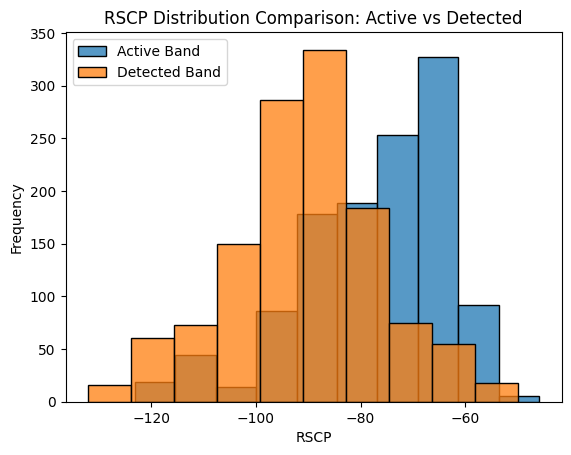

In [ ]:
print("\nStatistiques descriptives:")
print(df.describe())


Statistiques descriptives:
       Band (active)  Frame error rate  Channel number (active)_mean  \
count    8332.000000            8332.0                   8332.000000   
mean        0.790206               0.0                   9092.755123   
std         0.407186               0.0                   3129.133020   
min         0.000000               0.0                   3024.000000   
25%         1.000000               0.0                  10688.000000   
50%         1.000000               0.0                  10700.500000   
75%         1.000000               0.0                  10725.500000   
max         1.000000               0.0                  10738.000000   

       Scrambling code (active)_mean  RSCP (active)_mean  Ec/N0 (active)_mean  \
count                    1197.000000         1207.000000          1207.000000   
mean                      210.729323          -77.096520            -5.602817   
std                       105.595114           13.932708             3.763349   

In [ ]:
print("\nDescription statistique détaillée:\n")
print(df.describe(include='all'))


Description statistique détaillée:

                Time  Band (active)  Frame error rate  \
count           8332    8332.000000            8332.0   
unique          8299            NaN               NaN   
top      9:03:21.341            NaN               NaN   
freq               2            NaN               NaN   
mean             NaN       0.790206               0.0   
std              NaN       0.407186               0.0   
min              NaN       0.000000               0.0   
25%              NaN       1.000000               0.0   
50%              NaN       1.000000               0.0   
75%              NaN       1.000000               0.0   
max              NaN       1.000000               0.0   

        Channel number (active)_mean  Scrambling code (active)_mean  \
count                    8332.000000                    1197.000000   
unique                           NaN                            NaN   
top                              NaN                            N

<ipython-input-29-f79e61ee0a17>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees['RSCP (active)'], width=0.2, palette="colorblind")


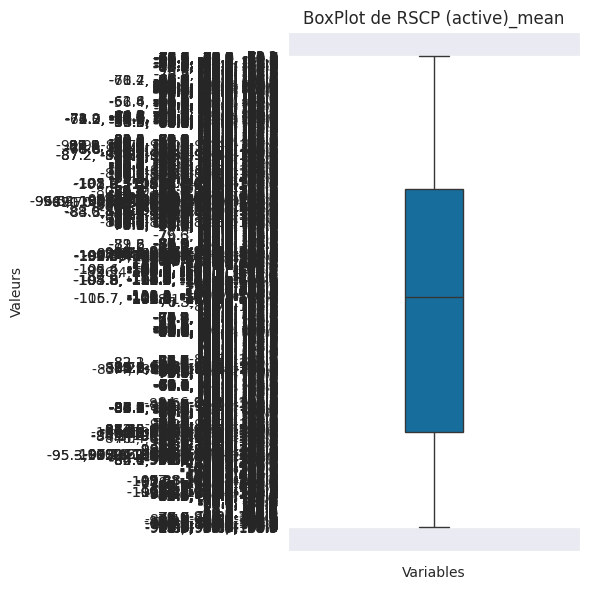

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 6))
sns.boxplot(data=donnees['RSCP (active)'], width=0.2, palette="colorblind")
plt.title("BoxPlot de RSCP (active)_mean")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.tight_layout()
plt.show()

<ipython-input-30-0b6ec3d8c0cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees['Band (active)'], width=0.2, palette="colorblind")
<ipython-input-30-0b6ec3d8c0cd>:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


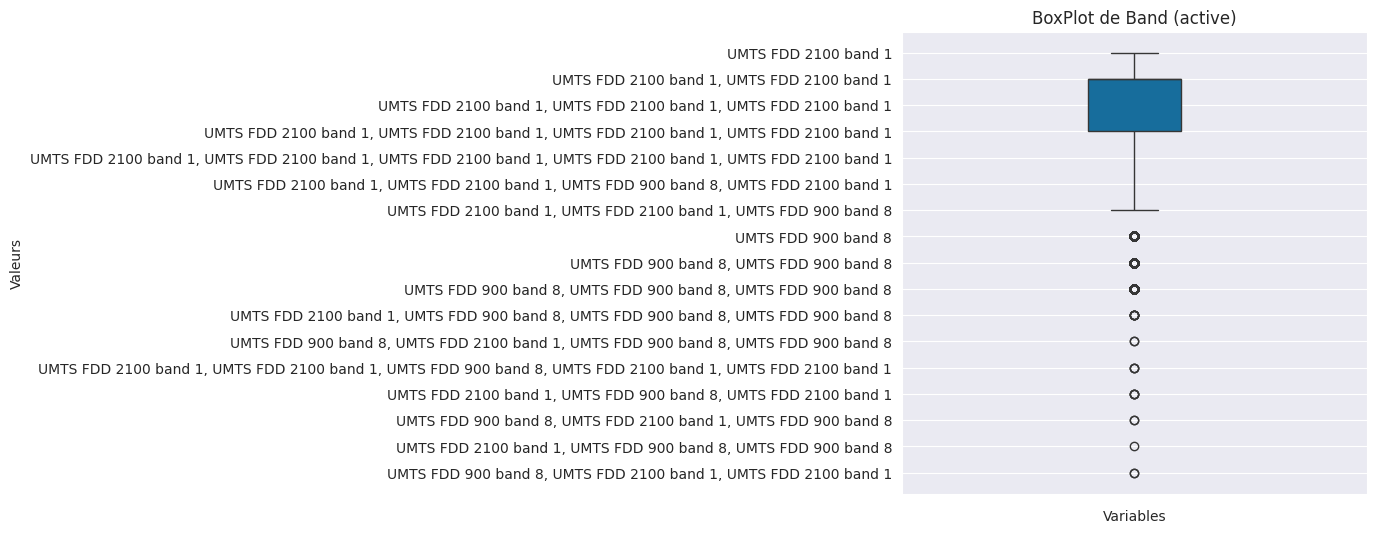

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 6))
sns.boxplot(data=donnees['Band (active)'], width=0.2, palette="colorblind")
plt.title("BoxPlot de Band (active)")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.tight_layout()
plt.show()

<ipython-input-31-fb9d61b4b10f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=donnees['Ec/N0 (active)'], width=0.2, palette="colorblind")


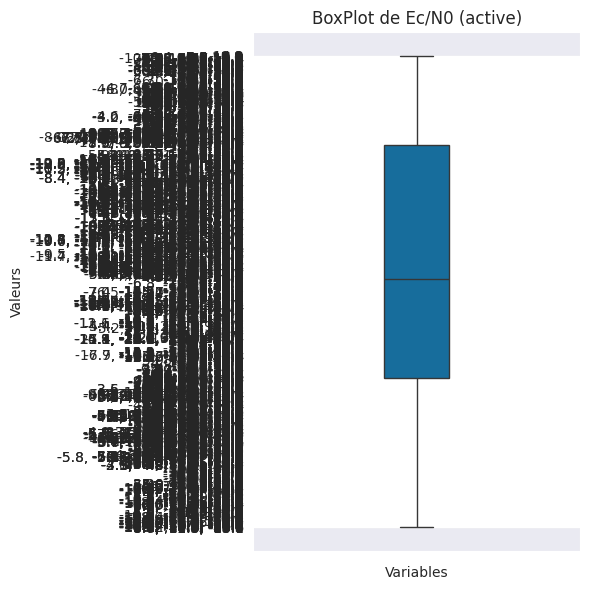

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 6))
sns.boxplot(data=donnees['Ec/N0 (active)'], width=0.2, palette="colorblind")
plt.title("BoxPlot de Ec/N0 (active)")
plt.xlabel("Variables")
plt.ylabel("Valeurs")
plt.tight_layout()
plt.show()

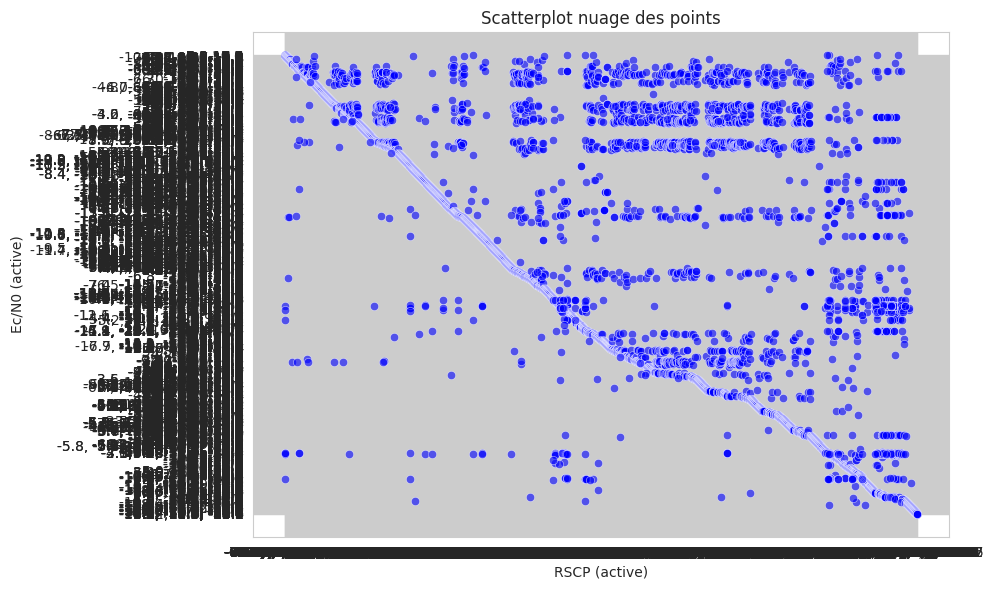

In [ ]:
nom_colonne_x = 'RSCP (active)'
nom_colonne_y = 'Ec/N0 (active)'
donnees = pd.read_csv("essai.csv", sep=';')
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=nom_colonne_x, y=nom_colonne_y, data=donnees, color='blue', alpha=0.6)
plt.title("Scatterplot nuage des points")
plt.xlabel("RSCP (active)")
plt.ylabel("Ec/N0 (active)")
plt.grid(True)
plt.tight_layout()
plt.show()


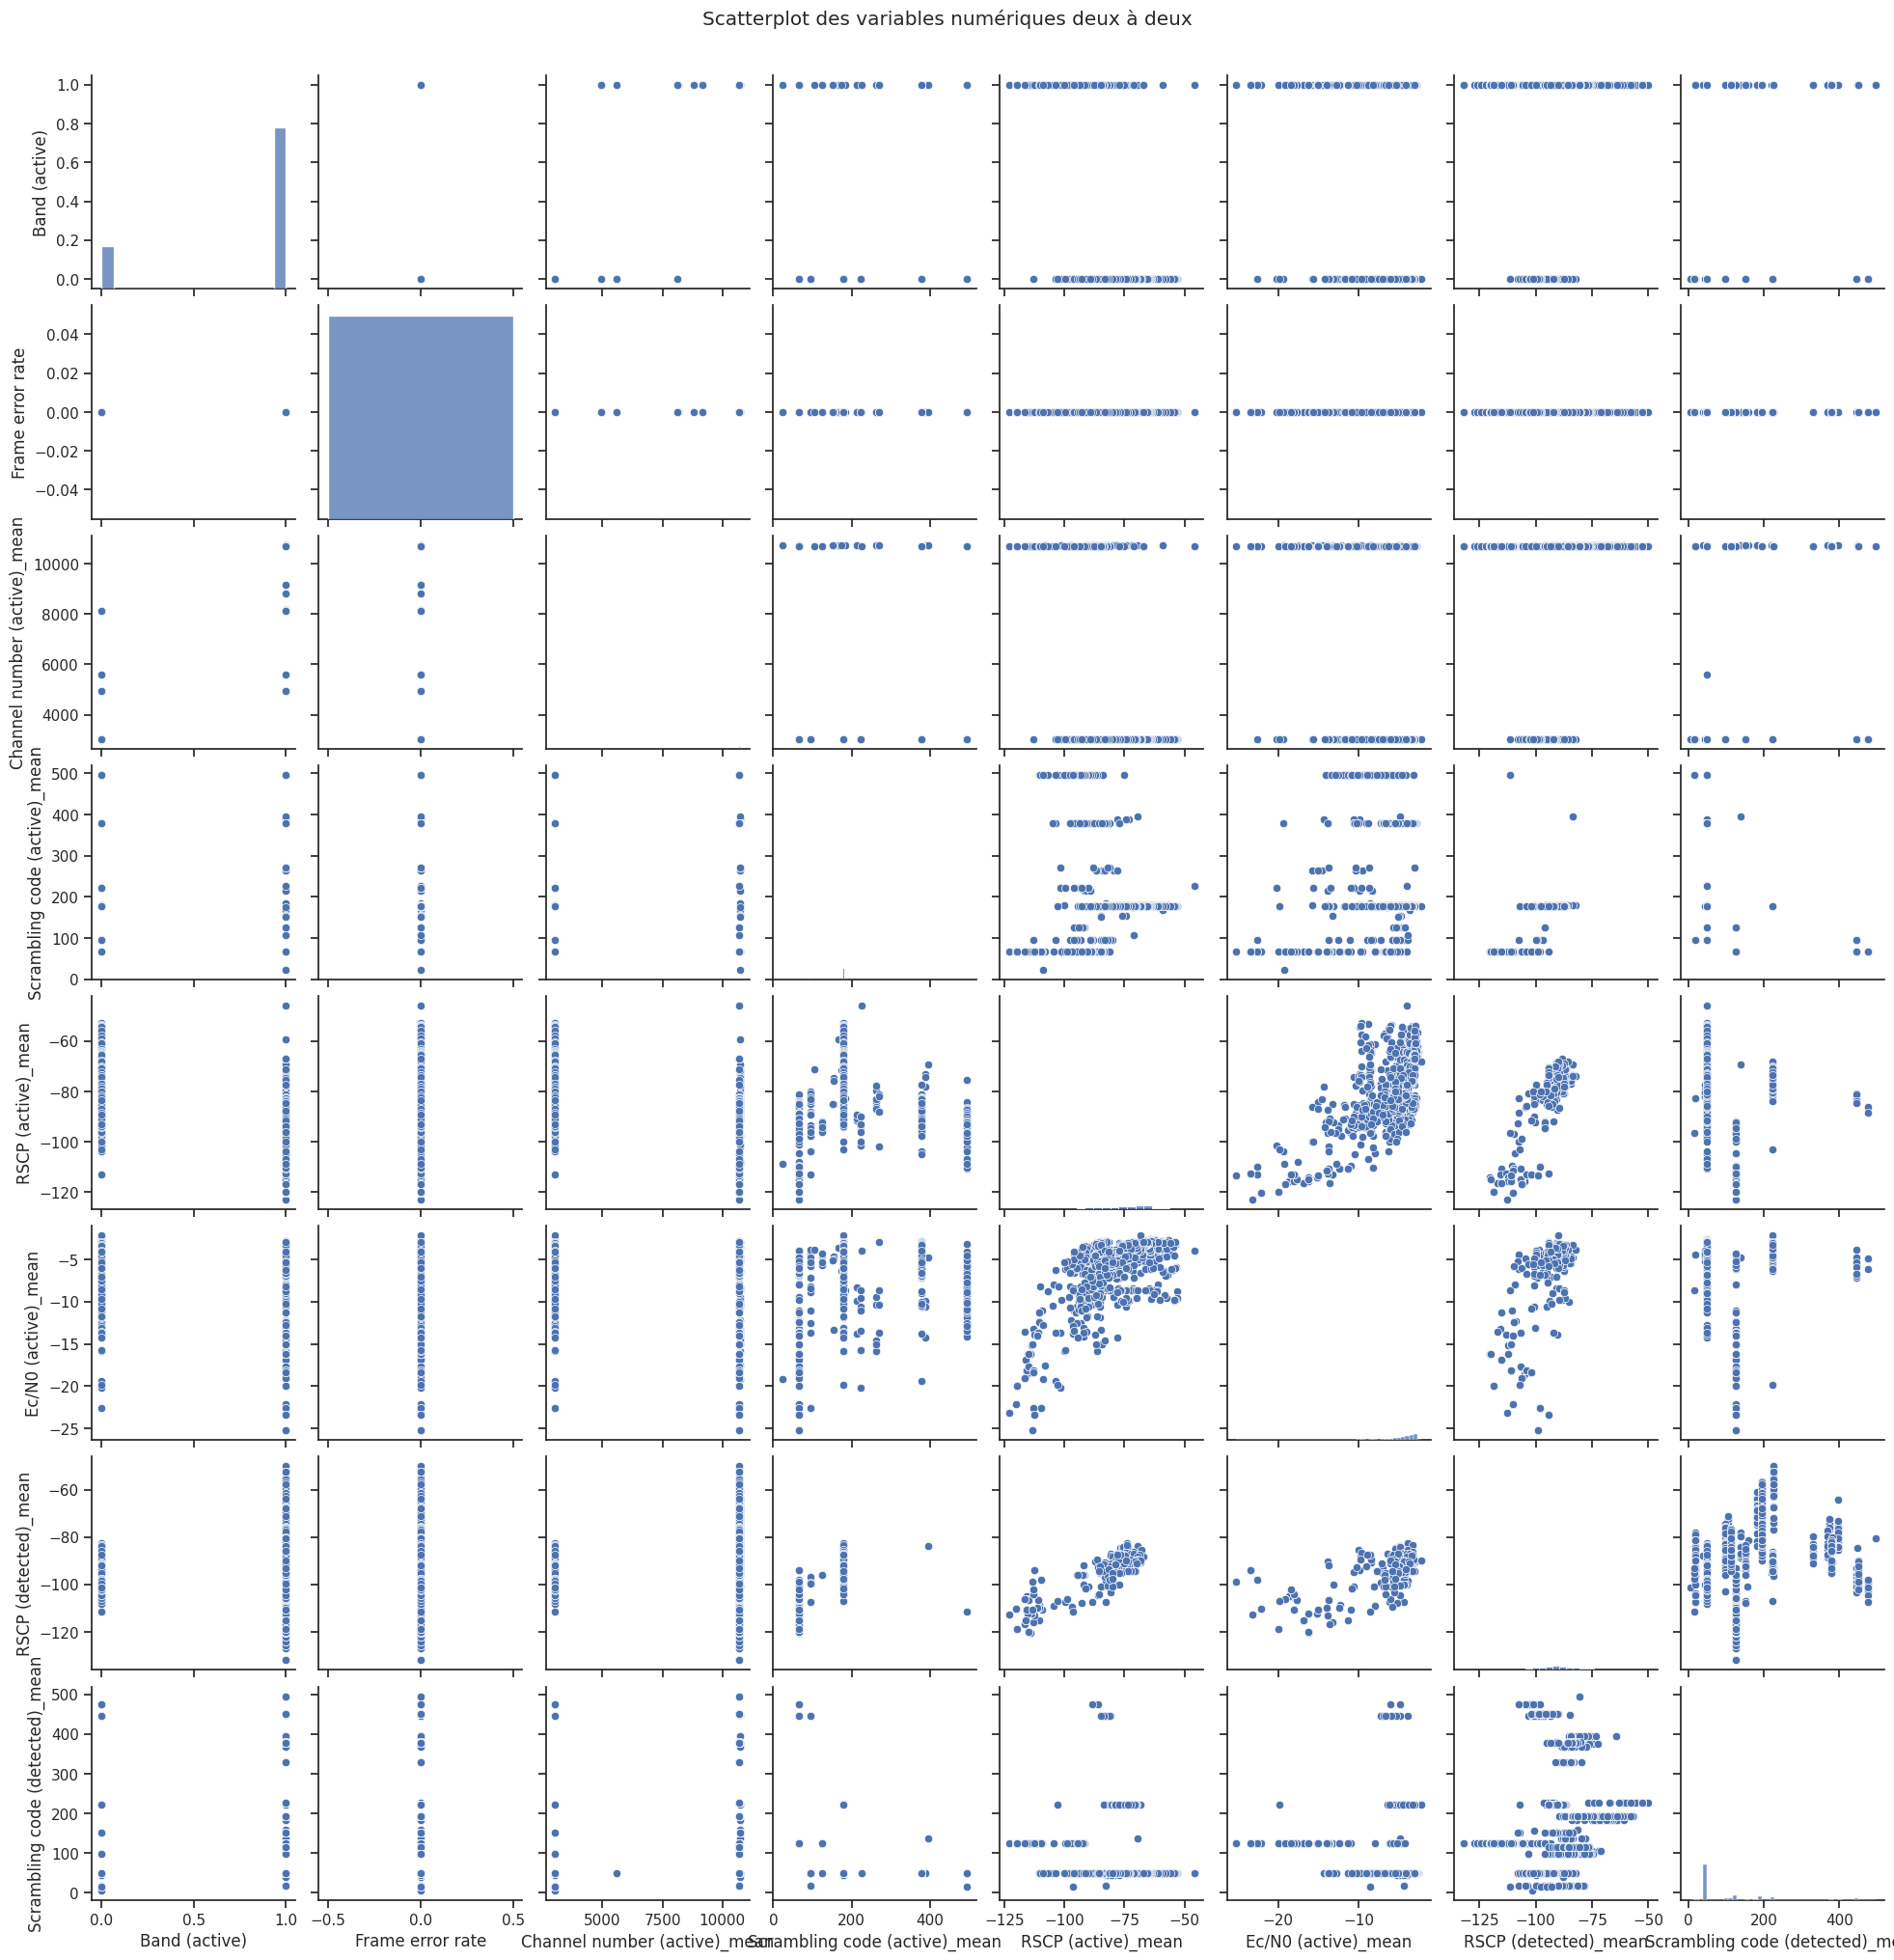

In [ ]:
sns.set(style="ticks")
pairplot = sns.pairplot(df)
pairplot.fig.suptitle("Scatterplot des variables numériques deux à deux", y=1.02)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8332 entries, 0 to 8331
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Time                             8332 non-null   object 
 1   Band (active)                    8332 non-null   int64  
 2   Frame error rate                 8332 non-null   float64
 3   Channel number (active)_mean     8332 non-null   float64
 4   Scrambling code (active)_mean    1197 non-null   float64
 5   RSCP (active)_mean               1207 non-null   float64
 6   Ec/N0 (active)_mean              1207 non-null   float64
 7   RSCP (detected)_mean             1251 non-null   float64
 8   Scrambling code (detected)_mean  2466 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 586.0+ KB


In [ ]:
df = donnees.drop('Time', axis=1)

In [ ]:
# Conversion de la colonne 'Band'
def convert_band(value):
    if pd.notna(value) and '2100' in str(value):
        return 1
    else:
        return 0

df['Band (active)'] = df['Band (active)'].apply(convert_band)

In [ ]:
# Conversion des colonnes et calcul de la moyenne pour chaque paire de valeurs
columns_to_convert = ['Channel number (active)', 'Scrambling code (active)',
                      'RSCP (active)', 'Ec/N0 (active)', 'RSCP (detected)', 'Scrambling code (detected)']

for column in columns_to_convert:
    # Conversion en type numérique
    df[column] = df[column].apply(lambda x: pd.to_numeric(x.split(', '), errors='coerce') if isinstance(x, str) else x)
    # Calcul de la moyenne et création d'une nouvelle colonne
    df[f'{column}_mean'] = df[column].apply(lambda x: np.nanmean(x) if isinstance(x, (list, np.ndarray)) else x)

<ipython-input-12-be61dbe3ec57>:9: RuntimeWarning: Mean of empty slice
  df[f'{column}_mean'] = df[column].apply(lambda x: np.nanmean(x) if isinstance(x, (list, np.ndarray)) else x)


In [ ]:
# Suppression des colonnes originales
df = df.drop(columns=columns_to_convert)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8332 entries, 0 to 8331
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Band (active)                    8332 non-null   int64  
 1   Frame error rate                 8 non-null      float64
 2   Channel number (active)_mean     8322 non-null   float64
 3   Scrambling code (active)_mean    8322 non-null   float64
 4   RSCP (active)_mean               8322 non-null   float64
 5   Ec/N0 (active)_mean              8321 non-null   float64
 6   RSCP (detected)_mean             7117 non-null   float64
 7   Scrambling code (detected)_mean  7117 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 520.9 KB


In [ ]:
df = df.drop('Frame error rate', axis = 1)

In [ ]:
df

,Band (active),Channel number (active)_mean,Scrambling code (active)_mean,RSCP (active)_mean,Ec/N0 (active)_mean,RSCP (detected)_mean,Scrambling code (detected)_mean
0,1,10738.0,387.000000,-73.200000,-9.900000,NaN,NaN
1,1,10738.0,387.000000,-78.100000,-14.300000,NaN,NaN
2,1,10738.0,387.000000,-74.300000,-10.600000,NaN,NaN
3,1,10725.5,387.000000,-70.000000,-7.100000,-75.4,266.5
4,1,10725.5,387.000000,-70.250000,-7.050000,-74.9,266.5
...,...,...,...,...,...,...,...
8327,0,3024.0,131.666667,-93.800000,-11.366667,-101.5,49.0
8328,0,3024.0,131.666667,-94.533333,-11.733333,-102.7,49.0
8329,0,3024.0,131.666667,-94.566667,-12.166667,-102.2,49.0
8330,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Matrice de corrélation
correlation_matrix = df.corr()

In [ ]:
print("\nMatrice de corrélation:")
print(correlation_matrix)


Matrice de corrélation:
                                 Band (active)  Channel number (active)_mean  \
Band (active)                         1.000000                      0.997201   
Channel number (active)_mean          0.997201                      1.000000   
Scrambling code (active)_mean         0.098410                      0.095828   
RSCP (active)_mean                   -0.004955                      0.000924   
Ec/N0 (active)_mean                  -0.012175                     -0.011224   
RSCP (detected)_mean                  0.260467                      0.266228   
Scrambling code (detected)_mean       0.359755                      0.362418   

                                 Scrambling code (active)_mean  \
Band (active)                                         0.098410   
Channel number (active)_mean                          0.095828   
Scrambling code (active)_mean                         1.000000   
RSCP (active)_mean                                   -0.005706   
Ec/N

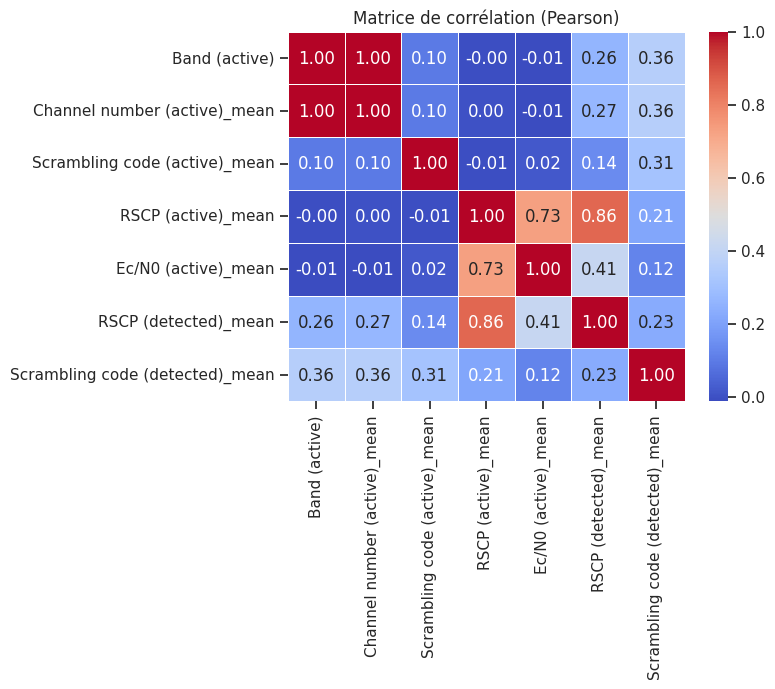

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation (Pearson)")
plt.show()

In [ ]:
donnees1 = donnees.drop('Time', axis=1)
#donnees2 = donnees1.drop('Channel number (active)', axis=1)
donnees3 = donnees1.drop('Scrambling code (detected)', axis=1)
donnees5= donnees3

In [ ]:
# Conversion de la colonne 'Band'
def convert_band(value):
    if pd.notna(value) and '2100' in str(value):
        return 1
    else:
        return 0

donnees5['Band (active)'] = donnees5['Band (active)'].apply(convert_band)

In [ ]:
# Conversion des colonnes et calcul de la moyenne pour chaque paire de valeurs
import numpy as np
columns_to_convert = ['RSCP (active)', 'Ec/N0 (active)', 'RSCP (detected)']

for column in columns_to_convert:
    # Conversion en type numérique
    donnees5[column] = donnees5[column].apply(lambda x: pd.to_numeric(x.split(', '), errors='coerce') if isinstance(x, str) else x)

<Axes: ylabel='count'>

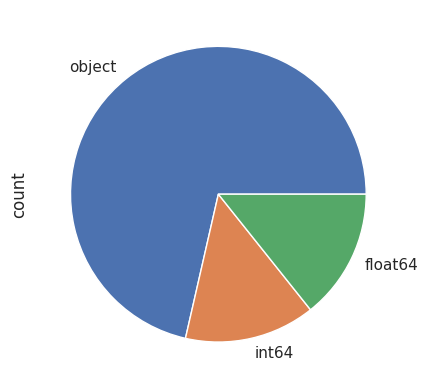

In [ ]:
donnees5.dtypes.value_counts().plot.pie()

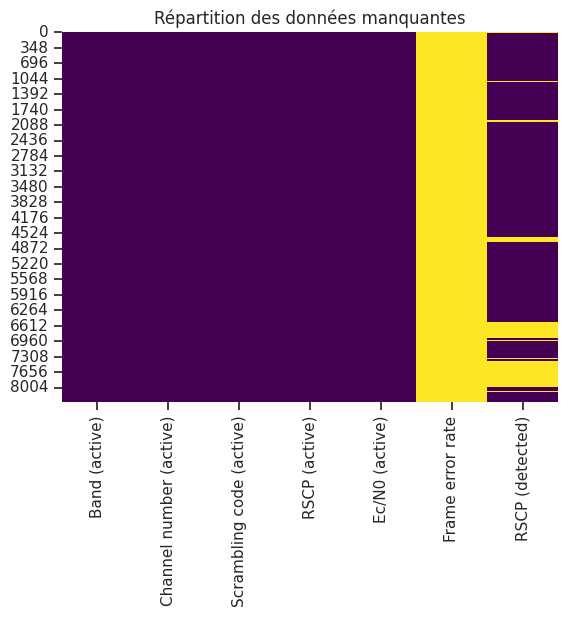

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(donnees5.isnull(), cbar=False, cmap='viridis')
plt.title("Répartition des données manquantes");

In [ ]:
print("\nDimensions de la nouvelle dataset:", donnees5.shape)


Dimensions de la nouvelle dataset: (8332, 7)


In [ ]:
import numpy as np

In [ ]:
print("DataFrame d'origine:\n")
print(donnees)

DataFrame d'origine:

              Time                                      Band (active)  \
0      8:36:11.915                               UMTS FDD 2100 band 1   
1      8:36:12.338                               UMTS FDD 2100 band 1   
2      8:36:13.021                               UMTS FDD 2100 band 1   
3      8:36:13.535         UMTS FDD 2100 band 1, UMTS FDD 2100 band 1   
4      8:36:14.018         UMTS FDD 2100 band 1, UMTS FDD 2100 band 1   
...            ...                                                ...   
8327   9:43:58.865  UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...   
8328   9:43:59.410  UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...   
8329   9:43:59.910  UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...   
8330   9:44:00.256                                                NaN   
8331   9:44:00.450  UMTS FDD 900 band 8, UMTS FDD 900 band 8, UMTS...   

     Channel number (active) Scrambling code (active)         RSCP (active)  \
0                     

In [ ]:
print (donnees5)

      Band (active) Channel number (active) Scrambling code (active)  \
0                 1                   10738                      387   
1                 1                   10738                      387   
2                 1                   10738                      387   
3                 1            10713, 10738                 387, 387   
4                 1            10738, 10713                 387, 387   
...             ...                     ...                      ...   
8327              0        3024, 3024, 3024             186, 31, 178   
8328              0        3024, 3024, 3024             31, 186, 178   
8329              0        3024, 3024, 3024             31, 186, 178   
8330              0                     NaN                      NaN   
8331              0        3024, 3024, 3024             31, 186, 178   

               RSCP (active)         Ec/N0 (active)  Frame error rate  \
0                    [-73.2]                 [-9.9]           

In [ ]:
donnees6 = donnees5.drop('Frame error rate',axis=1).copy()
donnees6

,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),RSCP (detected)
0,1,10738,387,[-73.2],[-9.9],NaN
1,1,10738,387,[-78.1],[-14.3],NaN
2,1,10738,387,[-74.3],[-10.6],NaN
3,1,"10713, 10738","387, 387","[-68.1, -71.9]","[-7.0, -7.2]","[-70.4, -80.4]"
4,1,"10738, 10713","387, 387","[-71.4, -69.1]","[-5.9, -8.2]","[-70.0, -79.8]"
...,...,...,...,...,...,...
8327,0,"3024, 3024, 3024","186, 31, 178","[-91.6, -92.0, -97.8]","[-10.1, -10.5, -13.5]",[-101.5]
8328,0,"3024, 3024, 3024","31, 186, 178","[-91.3, -93.7, -98.6]","[-9.2, -11.6, -14.4]",[-102.7]
8329,0,"3024, 3024, 3024","31, 186, 178","[-90.5, -94.3, -98.9]","[-8.8, -12.6, -15.1]",[-102.2]
8330,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
donnees6 = donnees6.astype(str)

donnees6 = donnees6.applymap(lambda x: str(x).replace('[', '').replace(']', '') if pd.notna(x) else x)
donnees6 = donnees6.applymap(lambda x: np.nan if pd.isna(x) else np.mean([float(num) for num in str(x).replace(',', ' ').split() if num != 'nan']) if 'nan' not in str(x) else np.nan)

import numpy as np
donnees6 = donnees6.applymap(lambda x: np.nan if pd.isna(x) else [float(num) for num in str(x).split()])

donnees6 = donnees6.applymap(lambda x: float(x[0]) if isinstance(x, list) and len(x) == 1 else float(x) if pd.notna(x) else np.nan)

donnees6
#donnees6.dtypes.value_counts().plot.pie()


,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),RSCP (detected)
0,1.0,10738.0,387.000000,-73.200000,-9.900000,NaN
1,1.0,10738.0,387.000000,-78.100000,-14.300000,NaN
2,1.0,10738.0,387.000000,-74.300000,-10.600000,NaN
3,1.0,10725.5,387.000000,-70.000000,-7.100000,-75.4
4,1.0,10725.5,387.000000,-70.250000,-7.050000,-74.9
...,...,...,...,...,...,...
8327,0.0,3024.0,131.666667,-93.800000,-11.366667,-101.5
8328,0.0,3024.0,131.666667,-94.533333,-11.733333,-102.7
8329,0.0,3024.0,131.666667,-94.566667,-12.166667,-102.2
8330,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Supprimer les lignes avec des valeurs NaN
donnees_sans_nan = donnees6.dropna()

In [ ]:
donnees_sans_nan

,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),RSCP (detected)
3,1.0,10725.5,387.000000,-70.000000,-7.100000,-75.40
4,1.0,10725.5,387.000000,-70.250000,-7.050000,-74.90
5,1.0,10725.5,387.000000,-72.800000,-7.600000,-76.90
6,1.0,10725.5,387.000000,-71.900000,-7.350000,-75.60
7,1.0,10725.5,387.000000,-71.100000,-6.250000,-75.45
...,...,...,...,...,...,...
8326,0.0,3024.0,131.666667,-95.166667,-12.333333,-99.50
8327,0.0,3024.0,131.666667,-93.800000,-11.366667,-101.50
8328,0.0,3024.0,131.666667,-94.533333,-11.733333,-102.70
8329,0.0,3024.0,131.666667,-94.566667,-12.166667,-102.20


**Quelques visualisations:**

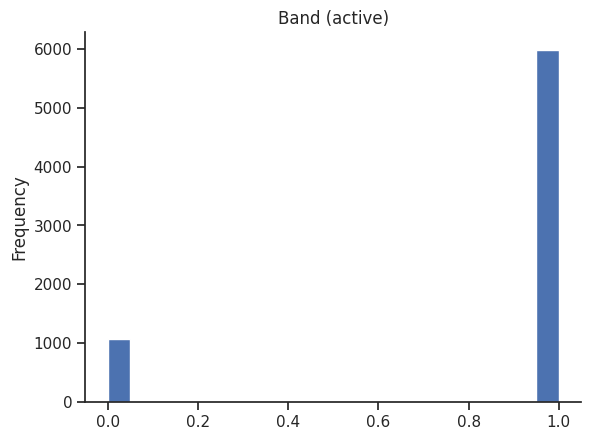

In [ ]:
# @title Band (active)

from matplotlib import pyplot as plt
donnees_sans_nan['Band (active)'].plot(kind='hist', bins=20, title='Band (active)')
plt.gca().spines[['top', 'right',]].set_visible(False)

**0: Bande 900MHz**

**1: Bande 2100MHz**

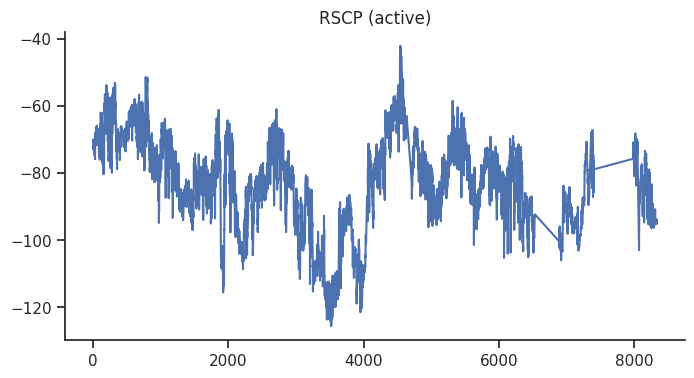

In [ ]:
donnees_sans_nan['RSCP (active)'].plot(kind='line', figsize=(8, 4), title='RSCP (active)')
plt.gca().spines[['top', 'right']].set_visible(False)

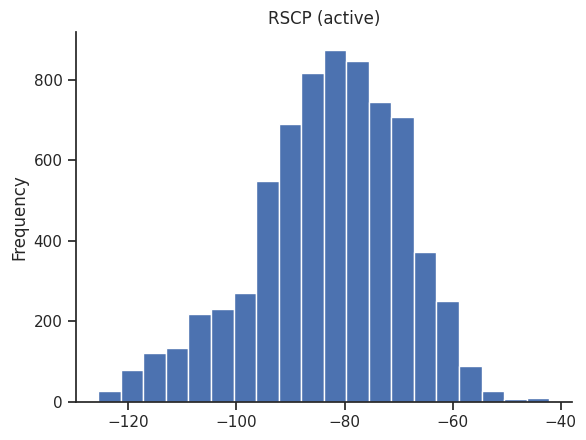

In [ ]:
donnees_sans_nan['RSCP (active)'].plot(kind='hist', bins=20, title='RSCP (active)')
plt.gca().spines[['top', 'right',]].set_visible(False)

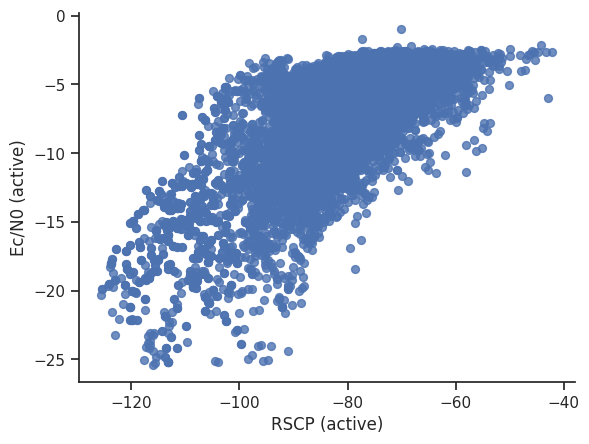

In [ ]:
donnees_sans_nan.plot(kind='scatter', x='RSCP (active)', y='Ec/N0 (active)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

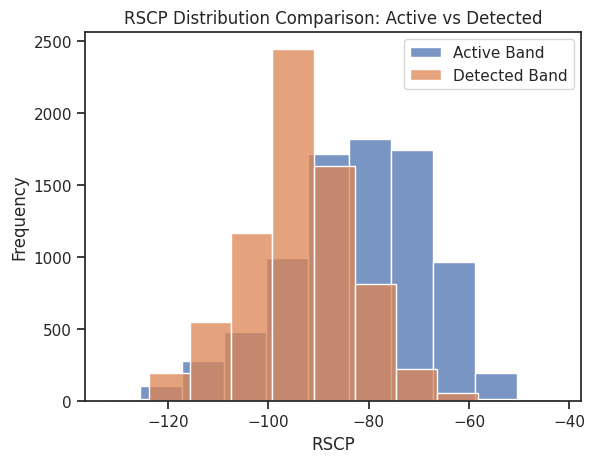

In [ ]:
# @title RSCP Distribution Comparison: Active vs Detected

import matplotlib.pyplot as plt
sns.histplot(data=df, x='RSCP (active)_mean', bins=10, label='Active Band')
sns.histplot(data=df, x='RSCP (detected)_mean', bins=10, label='Detected Band')
plt.xlabel('RSCP')
plt.ylabel('Frequency')
plt.title('RSCP Distribution Comparison: Active vs Detected')
_ = plt.legend()


Matrice de corrélation:


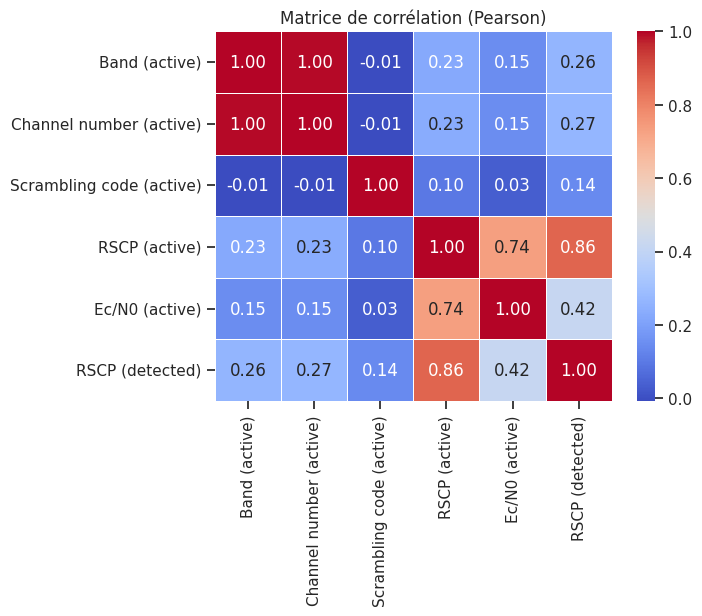

In [ ]:
print("\nMatrice de corrélation:")

correlation_matrix1 = donnees_sans_nan.corr()
#print(correlation_matrix1)
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation (Pearson)")
plt.show()


**Cette figure montre la corrélation entre les différentes variables qui vise donc à établir une mesure de l’association linéaire, ou la force d’un lien entre deux variables X et Y**

# **Partie 2 (Apprentissage)**

**choix du modèle(cas régression) :**

1. Division de la dataset après prétraitement en 2 parties: 80% entraînement et 20% test

In [ ]:
from sklearn.model_selection import train_test_split
#division de données entre test et entrainement
x=donnees_sans_nan[["Ec/N0 (active)", "RSCP (detected)","Band (active)","Channel number (active)"]]
y=donnees_sans_nan["RSCP (active)"]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.2 )

2. Modèles ML

2.1 importation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

2.2 Définition, entraînement et évaluation (R² score et MSE) cas Y = Couverture

In [ ]:
# Définition des modèles
models = {
    'Random Forest Regressor': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
}

# Entraînement et évaluation des modèles
print("\n{:<30} {:<30} {:<30} {:<30} {:<30}".format("Modèle", "MSE (training set)", "R2 score(training set)", "MSE (test set)", "R2 score (test set)"))
print("=" * 150)

for model_name, model in models.items():
    # Entraînement du modèle
    model.fit(Xtrain, Ytrain)

    # Prédictions sur l'ensemble d'entraînement
    y_train_pred = model.predict(Xtrain)
    mse_train = mean_squared_error(Ytrain, y_train_pred)
    r2_train = r2_score(Ytrain, y_train_pred)

    # Prédictions sur l'ensemble de test
    y_test_pred = model.predict(Xtest)
    mse_test = mean_squared_error(Ytest, y_test_pred)
    r2_test = r2_score(Ytest, y_test_pred)

    # Affichage des résultats
    print("{:<30} {:<30.2f} {:<30.2f} {:<30.2f} {:<30.2f}".format(model_name, mse_train, r2_train, mse_test, r2_test))


Modèle                         MSE (training set)             R2 score(training set)         MSE (test set)                 R2 score (test set)           
Random Forest Regressor        1.56                           0.99                           10.38                          0.94                          
Linear Regression              15.74                          0.92                           15.28                          0.92                          
Decision Tree Regressor        0.06                           1.00                           17.26                          0.91                          
Support Vector Regressor       181.55                         0.04                           174.59                         0.06                          


**on remarque que Random Forest Regresssor et Decision Tree Regressor sont les plus perfermants sur les données de test et d'entrainement**

**==>pour des raisons de compexité de modèle on va choisir le Random Forest Regresssor**

**Choix du modèle (cas Y=Qualité):**

1. Division de la dataset après prétraiement en 2 parties: 80% entraînement et 20% test

In [ ]:
#division de la data entre test et entraînement:
X1=donnees_sans_nan[["RSCP (detected)","Band (active)","RSCP (active)"]] #couverture
Y1=donnees_sans_nan['Ec/N0 (active)'] #qualité
X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1, Y1, test_size=0.2, random_state=42)

évaluation cas Y = Qualité (RMSE)

In [ ]:
#Decision Tree Regresssor:
arbre_decision=DecisionTreeRegressor(random_state=42)
arbre_decision.fit(X1_train, Y1_train)
y_pred_ad= arbre_decision.predict(X1_test)
rmse_ad=np.sqrt(mean_squared_error(Y1_test,y_pred_ad))
print("Decision Tree Regressor RMSE: ",rmse_ad)


Decision Tree Regressor RMSE:  2.8017834762207348


In [ ]:
#Random Forest Regressor :
rf_regressor=RandomForestRegressor(random_state=42)
rf_regressor.fit(X1_train, Y1_train)
y_pred_rf=rf_regressor.predict(X1_test)
rmse_rf=np.sqrt(mean_squared_error(Y1_test, y_pred_rf))
print("Random Forest Regressor RMSE :",rmse_rf)

Random Forest Regressor RMSE : 2.0294069324486324


In [ ]:
#linear Regression:
linear_rg=LinearRegression()
linear_rg.fit(X1_train, Y1_train)
y_pred_lr=linear_rg.predict(X1_test)
rmse_lr=np.sqrt(mean_squared_error(Y1_test, y_pred_lr))
print("Linear Regression RMSE :",rmse_lr)

Linear Regression RMSE : 2.4178108627158807


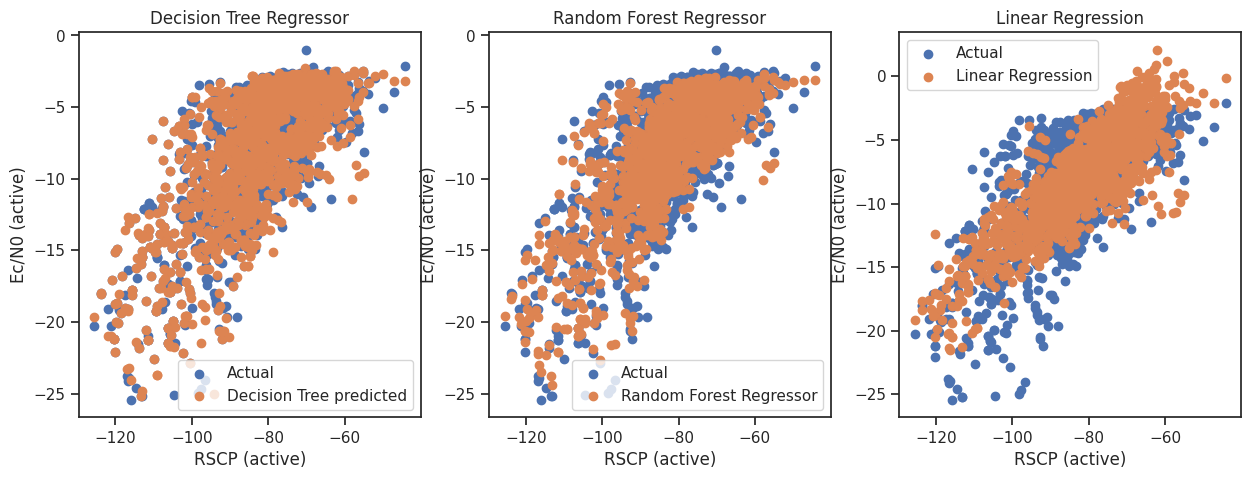

In [ ]:
#plotting
#Decision Tree Regressor
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X1_test['RSCP (active)'], Y1_test, label='Actual')
plt.scatter(X1_test['RSCP (active)'], y_pred_ad, label='Decision Tree predicted')
plt.xlabel('RSCP (active)')
plt.ylabel('Ec/N0 (active)')
plt.title('Decision Tree Regressor')
plt.legend()
#Random Forest Regressor
plt.subplot(1, 3, 2)
plt.scatter(X1_test['RSCP (active)'], Y1_test, label='Actual')
plt.scatter(X1_test['RSCP (active)'], y_pred_rf, label='Random Forest Regressor')
plt.xlabel('RSCP (active)')
plt.ylabel('Ec/N0 (active)')
plt.title('Random Forest Regressor')
plt.legend()
#linear Regression
plt.subplot(1, 3, 3)
plt.scatter(X1_test['RSCP (active)'], Y1_test, label='Actual')
plt.scatter(X1_test['RSCP (active)'], y_pred_lr, label='Linear Regression')
plt.xlabel('RSCP (active)')
plt.ylabel('Ec/N0 (active)')
plt.title('Linear Regression')
plt.legend()

**Comparaison visuelle des modèles candidates**

**1. Problème de respiration de cellules**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#division de la data entre test et entrainement:
Xh = donnees_sans_nan.drop(["Band (active)"], axis=1)
Yh = donnees_sans_nan['Band (active)']
Xh_train, Xh_test, Yh_train, Yh_test=train_test_split(Xh, Yh, test_size=0.2, random_state=42)

#entrainement du modèle:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(Xh_train, Yh_train)

#prédiction sur l'ensemble de test
Yh_pred = classifier.predict(Xh_test)

#evaluation du modèle
accuracy = accuracy_score(Yh_test, Yh_pred)
conf_matrix = confusion_matrix(Yh_test, Yh_pred)
classification_rep = classification_report(Yh_test, Yh_pred)

#Affichage des résultats :
print(f'précision du modèle:{accuracy: .2f}')
print(f'\nMatrice de confusion:\n{conf_matrix}')
print(f'\nRapport de classification:\n{classification_rep}')

précision du modèle: 1.00

Matrice de confusion:
[[ 195    0]
 [   0 1217]]

Rapport de classification:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00      1217

    accuracy                           1.00      1412
   macro avg       1.00      1.00      1.00      1412
weighted avg       1.00      1.00      1.00      1412



# **interpréation:**

**Dans ce rapport de classification on la précision est égale à 1 qui signifie que dans tout le temps que le modèle prédit une classe il est vrai.**

**On a aussi le recall est égale à 1 qui signifie qu’il ya pas des classes manquantes dans la prédiction, ce qui est le cas pour les deux bandes 0 et 1.**

**F1_score est 1 ce qui indique la forte performance de modèle.
Accuracy indique la proportion des prédictions correctes parmi toutes les prédictions.**

**La matrice de confusion montre le nombre des prédictions correctes et incorrecte dans notre
cas toutes les prédictions sont correctes.**

In [ ]:
Yh_pred

array([0., 1., 1., ..., 1., 1., 1.])

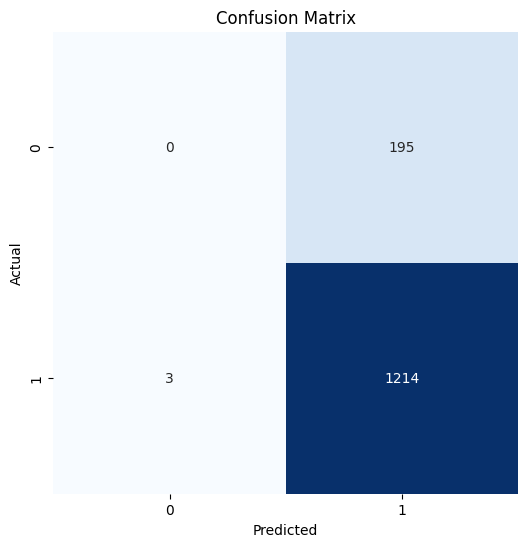

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

donnees6 = donnees6.dropna()
imputer = SimpleImputer(strategy='mean')

X_features = donnees_sans_nan[["Ec/N0 (active)", "RSCP (active)"]]
y_target = donnees_sans_nan['Band (active)']
X_features_imputed = pd.DataFrame(imputer.fit_transform(X_features), columns=X_features.columns)

Xf_train, Xf_test, Yt_train, Yt_test = train_test_split(X_features_imputed, y_target, test_size=0.2, random_state=42)

logreg_model = LogisticRegression()
logreg_model.fit(Xf_train, Yt_train)

predict_inter = logreg_model.predict(Xf_test)

accuracy = accuracy_score(Yt_test, predict_inter)


cm = confusion_matrix(Yt_test, predict_inter)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Interprétation :**

**Nous observons que trois décisions de transfert intercellulaire (handover) ont été prises pour déplacer les utilisateurs de la bande 1 (2100 MHz) vers la bande 0 (900 MHz)**

In [ ]:
# Import des bibliothèques
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Séparer les données en ensembles d'entraînement et de test
X1 = donnees_sans_nan.drop(['Band (active)'], axis=1)
Y1 = donnees_sans_nan['Band (active)']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de classification
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X1_train, Y1_train)

# Prédictions sur l'ensemble de test
Y1_pred = classifier.predict(X1_test)

# Évaluation du modèle
accuracy = accuracy_score(Y1_test, Y1_pred)
conf_matrix = confusion_matrix(Y1_test, Y1_pred)
classification_rep = classification_report(Y1_test, Y1_pred)

# Affichage des résultats
print(f'Précision du modèle : {accuracy:.2f}')
print(f'\nMatrice de confusion :\n{conf_matrix}')
print(f'\nRapport de classification :\n{classification_rep}')

Précision du modèle : 1.00

Matrice de confusion :
[[ 195    0]
 [   0 1217]]

Rapport de classification :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00      1217

    accuracy                           1.00      1412
   macro avg       1.00      1.00      1.00      1412
weighted avg       1.00      1.00      1.00      1412



**modèle de régression logistique pour prédire la bande
active en fonction de la qualité et la couverture**
# **Interprétation:**
**la précision est égale à 1 qui signifie que dans tout
le temps que le modèle prédit une classe il est vrai.**

**On a aussi le recall est égale à 1 qui signifie qu’il ya pas des classes manquant dans la prédiction. Ce qui est le cas pour les deux
bandes 0 et 1.**

**F1_score est 1 ce qui indique la forte performance de modèle.
Accuracy indique la proportion des prédictions correctes parmi toutes les prédictions**

**2. Problème d'interférences**

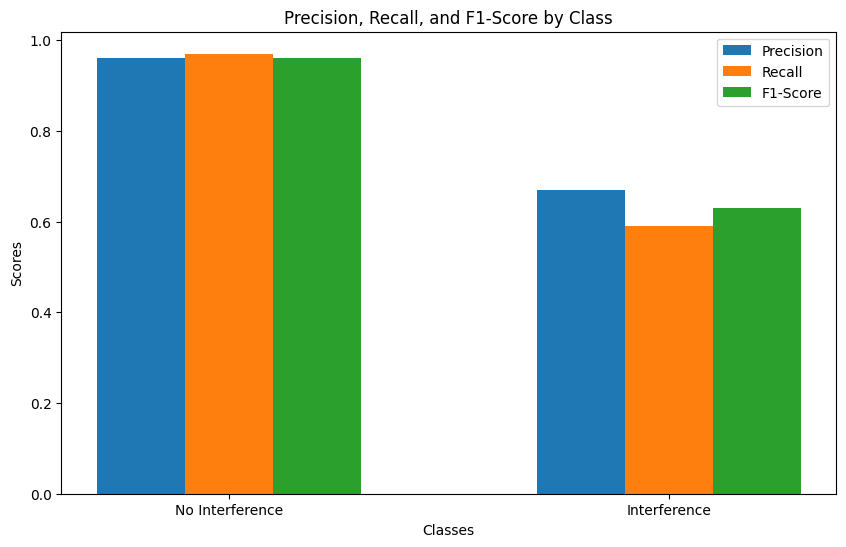

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Classification report values
precision = [0.96, 0.67]
recall = [0.97, 0.59]
f1_score = [0.96, 0.63]

# Classes
classes = ['No Interference', 'Interference']

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(classes))
bar1 = ax.bar(index, precision, bar_width, label='Precision')
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall')
bar3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score')
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes)
ax.legend()
plt.show()

**nous avons 2 classes (‘interference’ et ‘no interference’)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report

# Select relevant columns for features
X_features = donnees_sans_nan[["Ec/N0 (active)","RSCP (active)", "RSCP (detected)", "Channel number (active)"]]
y_target = donnees_sans_nan["Band (active)"]

# Split the data into training and testing sets
Xi_train, Xi_test, yi_train, yi_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Train a logistic regression model for interference prediction
model = LogisticRegression()
model.fit(Xi_train , yi_train)

# Make predictions on the test set
predicted_interference = model.predict(Xi_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(yi_test, predicted_interference))
print("\nClassification Report:")
print(classification_report(yi_test, predicted_interference))

Confusion Matrix:
[[ 195    0]
 [   0 1217]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       195
         1.0       1.00      1.00      1.00      1217

    accuracy                           1.00      1412
   macro avg       1.00      1.00      1.00      1412
weighted avg       1.00      1.00      1.00      1412



**nous avons dans ce cas comme input la qualité, les couvertures actives et détectées et le numéro du canal et comme output la bande active.**

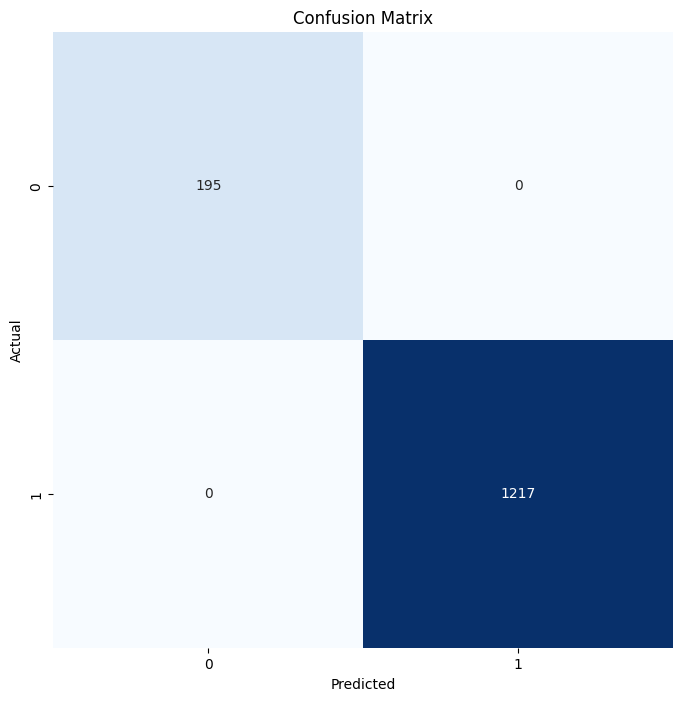

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
yi_pred = model.predict(Xi_test)

# Calculate confusion matrix
conf_mat = confusion_matrix(yi_test, yi_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
yi_pred

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
donnees_sans_nan['Ec/N0 (active)'] = donnees_sans_nan['Ec/N0 (active)'].abs()
donnees_sans_nan['RSCP (active)'] = donnees_sans_nan['RSCP (active)'].abs()
donnees_sans_nan

<ipython-input-33-9b57ec4b2293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_sans_nan['Ec/N0 (active)'] = donnees_sans_nan['Ec/N0 (active)'].abs()
<ipython-input-33-9b57ec4b2293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_sans_nan['RSCP (active)'] = donnees_sans_nan['RSCP (active)'].abs()


,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),RSCP (detected)
3,1.0,10725.5,387.000000,70.000000,7.100000,-75.40
4,1.0,10725.5,387.000000,70.250000,7.050000,-74.90
5,1.0,10725.5,387.000000,72.800000,7.600000,-76.90
6,1.0,10725.5,387.000000,71.900000,7.350000,-75.60
7,1.0,10725.5,387.000000,71.100000,6.250000,-75.45
...,...,...,...,...,...,...
8326,0.0,3024.0,131.666667,95.166667,12.333333,-99.50
8327,0.0,3024.0,131.666667,93.800000,11.366667,-101.50
8328,0.0,3024.0,131.666667,94.533333,11.733333,-102.70
8329,0.0,3024.0,131.666667,94.566667,12.166667,-102.20


**les décisions dans le cas d'interférences**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Charger le DataFrame à partir de votre source de données
# Définir la colonne 'Interférence' en fonction des critères spécifiés
seuil_bon_EcN0 = 7  # Seuil pour une mauvaise valeur de Ec/N0
seuil_mauvaise_RSCP = 100  # Seuil pour une bonne valeur de RSCP

donnees_sans_nan['Interférence'] = np.where((donnees_sans_nan['Ec/N0 (active)'] > seuil_bon_EcN0) & (donnees_sans_nan['RSCP (active)'] < seuil_mauvaise_RSCP), 1, 0)

# Séparation des données en ensemble d'entraînement et ensemble de test
X_features = donnees_sans_nan[['Channel number (active)', 'RSCP (active)', 'Ec/N0 (active)', 'Band (active)', 'RSCP (detected)']]
y_target = donnees_sans_nan['Interférence']

Xi_train, Xi_test, yi_train, yi_test = train_test_split(X_features, y_target, test_size=0.2, random_state=42)

# Entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(Xi_train, yi_train)

# Prédictions sur l'ensemble de test
predicted_interference = model.predict(Xi_test)

# Évaluation du modèle
print("Confusion Matrix:")
print(confusion_matrix(yi_test, predicted_interference))
print("\nClassification Report:")
print(classification_report(yi_test, predicted_interference))

# Analyse des prédictions et prise de décision
# Identifier les cas où une interférence est détectée
interference_cases = Xi_test[yi_test == 1]

# Prendre des décisions basées sur les prédictions
for index, case in interference_cases.iterrows():
    # Exemple de décision : modifier la bande active ou ajuster RSCP (active)
    if case['Band (active)'] != 1:
        print("Changer la bande active pour l'index :", index)
    else:
        print("Ajuster RSCP (active) pour l'index :", index)


<ipython-input-34-5fa5cf35c13d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_sans_nan['Interférence'] = np.where((donnees_sans_nan['Ec/N0 (active)'] > seuil_bon_EcN0) & (donnees_sans_nan['RSCP (active)'] < seuil_mauvaise_RSCP), 1, 0)


Confusion Matrix:
[[755 131]
 [243 283]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       886
           1       0.68      0.54      0.60       526

    accuracy                           0.74      1412
   macro avg       0.72      0.70      0.70      1412
weighted avg       0.73      0.74      0.73      1412

Changer la bande active pour l'index : 7082
Ajuster RSCP (active) pour l'index : 461
Ajuster RSCP (active) pour l'index : 5673
Changer la bande active pour l'index : 3073
Ajuster RSCP (active) pour l'index : 2986
Ajuster RSCP (active) pour l'index : 1612
Ajuster RSCP (active) pour l'index : 263
Ajuster RSCP (active) pour l'index : 1682
Ajuster RSCP (active) pour l'index : 700
Ajuster RSCP (active) pour l'index : 345
Changer la bande active pour l'index : 3075
Changer la bande active pour l'index : 7155
Ajuster RSCP (active) pour l'index : 5114
Ajuster RSCP (active) pour l'index : 6367
Changer la bande

**interprétation:**

**Pour la bande 0 nous remarquons que le modèle a bien prédit 85% des colonnes ainsi que pour la bande 1 le modèle a prédit seulement 54% des données de test avec une précision de 68% ce qui explique la matrice de confusion qui n’a pas la forme diagonale. Dans les prédictions manquantes nous avons des interférences qu’il faut les corriger soit par le changement de RSCP (active) ou par le changement de la bande (décision pris par notre modèle de classification dans le cas d’interférences)**

In [ ]:
donnees_sans_nan

,Band (active),Channel number (active),Scrambling code (active),RSCP (active),Ec/N0 (active),RSCP (detected),Interférence
3,1.0,10725.5,387.000000,70.000000,7.100000,-75.40,1
4,1.0,10725.5,387.000000,70.250000,7.050000,-74.90,1
5,1.0,10725.5,387.000000,72.800000,7.600000,-76.90,1
6,1.0,10725.5,387.000000,71.900000,7.350000,-75.60,1
7,1.0,10725.5,387.000000,71.100000,6.250000,-75.45,0
...,...,...,...,...,...,...,...
8326,0.0,3024.0,131.666667,95.166667,12.333333,-99.50,1
8327,0.0,3024.0,131.666667,93.800000,11.366667,-101.50,1
8328,0.0,3024.0,131.666667,94.533333,11.733333,-102.70,1
8329,0.0,3024.0,131.666667,94.566667,12.166667,-102.20,1


In [ ]:
pip install mlflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.7 MB/s eta 0:00:00


In [ ]:
from sqlalchemy import create_engine
import pandas as pd

In [ ]:
predictions_df = yi_pred

In [ ]:
type(predictions_df)

numpy.ndarray

In [ ]:
predictions_df = pd.DataFrame(predictions_df)

In [ ]:
type(predictions_df)

pandas.core.frame.DataFrame

In [ ]:
predictions_df

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1407,1.0
1408,1.0
1409,1.0
1410,1.0
